In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import math
from random import randint
plt.style.use('ggplot')
from plotting_functions import plot_single_run, pretty_plot_gs
# initialize the random seed 
np.random.seed(0)

## Local Greedy Search
The problem is to use local search to find a minimum of a Cost Function $\min cost(s)$ where $s = \{s_1, \ldots, s_m\}$ where $s$ is a vector whose components can be integer, continuous or both. All heuristic algorithms have three components:
1. Initial Solution
2. Neighborhood
3. Improvement algorithm

For the local greedy search:
1. Initial solution: randomly pick a $s_{curr}$
2. Neighborhood: search the $cost(s)$ function $\forall s\in \{s_{curr}\pm d\}$ where $d$ is the range
3. Improvement algorithm: Pick the new solution in the neighbourhood that has the best objective function to be $s_{curr}$ in the next iteration




- **Overview of Search Algorithms**  

The following four search algorithms differ in how they update the current solution during the optimization process.  

 1. **Random Walk** (RW)  
In this approach, the next value of $s$ is randomly selected from the neighboring values of the current solution, $s_{\text{current}}$.  
Throughout the process, we keep track of the best solution found so far, $s_{\text{best}}$, along with its corresponding function value, $\cos(s_{\text{best}})$.  

 2. **Random Sampling** (RS)  
Unlike the random walk, this method selects the next value of $s$ randomly from *all* possible values, rather than just the neighbors of $s_{\text{current}}$.  
As in RW, we continuously update $s_{\text{best}}$ and store $\cos(s_{\text{best}})$.  

 3. **Greedy Deterministic** (GD)  
In this method, we always choose the best available neighbor of $s_{\text{current}}$, ensuring a deterministic improvement at each step.  

 4. **Greedy Stochastic** (GS)  
The next value of $s$ is randomly selected from the neighbors of the best current solution $s_{\text{best}}$.  
Unlike the deterministic approach, this allows for some exploration while still favoring local improvement.  


**Step 1**: Define the Cost Function.

For this example the **cost function** is given by:
  \begin{equation}
    f(s)= (400-(s-21)^2)\cdot \sin(s\pi/6)
\end{equation}
The constraint on $s: s\in\mathbb{N}, 0\leq s\leq 500$.
The **neighbourhood function** that is implements below for step 2 considers $\forall s, s.t. max(s_{current}-25, 0)\leq s \leq \min(s_{current}+25, 500)$


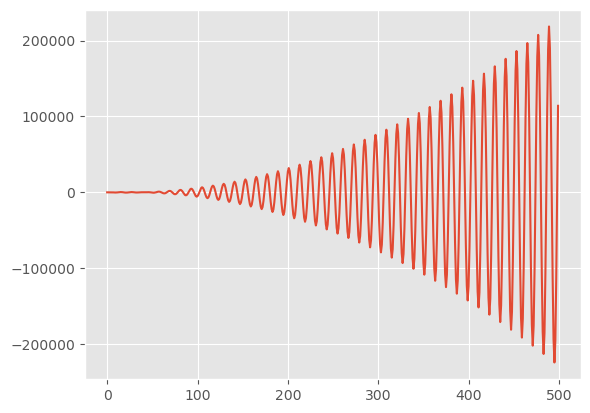

In [2]:
def cost(s):
    ''' returns the evaluation of the cost function
    on a numpy array of imputs
    '''
    return (400 - (s-21)**2)* np.sin(s*math.pi/6)

x = np.arange(0,500, 1)
y = cost(x)
plt.plot(x,y)

- Define what it is considered as a **neighbor** in a deterministic way.

In [3]:
def neighbors(s, min_s = 0, max_s = 500, d = 25):
    # Create a range of values from (s - d) to (s + d), but limit the range 
    # within [min_s, max_s] to avoid going outside the boundaries.
    neigh = np.arange(max(s-d, min_s), min(s+d+1, max_s))
    
    # Return the neighbors, excluding the current point 's' itself
    return neigh[neigh != s]

- Define what it is considered as a **random neighbor**.

In [4]:
def random_neighbor(s, min_s = 0, max_s = 500, d = 25):
    # Initialize s_new to the current position, s
    s_new = s
    
    # Repeat the process until s_new is different from s
    while(s_new == s):
        # Generate a random value within the range [max(s-d, min_s), min(s+d, max_s)]
        # The new value is constrained by the boundaries (min_s and max_s) and the distance d.
        s_new = randint(max(s-d, min_s), min(s+d, max_s))
    
    # Return the new neighbor, which is different from the current position s
    return s_new

- Initialize the variables where we will store the information:

In [5]:
# We first define times=1 because we will compute more times all the optimization processes in a second part of the notebook.
times=1
maxIter = 201
result = {'RW':np.empty((times, maxIter, 5)) , 'RS':np.empty((times, maxIter, 5)), 'GD':np.empty((times, maxIter, 5)), 'GS':np.empty((times, maxIter, 5))}

# We define the same initial point:

initial_point = 10


# Exercise 1: Random Walk

The Random Walk algorithm is a basic optimization technique where, starting from an initial solution, the algorithm explores the solution space by randomly selecting neighboring solutions and updating the best solution based on the cost (or objective function) values.

- **Objective**
Implement the **Random Walk (RW) algorithm** for optimization from scratch. 

Given a cost function and the definition of neighboring:

- **Instructions**

- At each iteration, we will perturb the current solution and evaluate its performance. Specifically, we will:

  
0. Start with an initial solution `sInitial` and evaluate its cost using the given `cost()` function.
1. **Generate a new solution**: Use the `random_neighbor(sCurrent)` function to Randomly perturb the current solution and generate a new solution.
2. **Evaluate the new solution’s cost**: After obtaining the new solution, calculate its cost using the `cost(sCurrent)` function.
3. **Update the best solution**: If the new solution’s cost is better (lower) than the best solution found so far, update the best solution and best cost.
4. **Store iteration data**: For each iteration, store the following information in a matrix:
   - The iteration number.
   - The current solution (`sCurrent`).
   - The best solution found so far (`sBest`).
   - The cost of the current solution.
   - The cost of the best solution.

5. **Repeat** steps 1-3 for a specified number of iterations (`maxIter`).

Hint: The matrix should be initialized with dimensions of `maxIter` (number of iterations) by 5 (for the 5 pieces of data you want to store).

To initialize the matrix, you can use NumPy’s `empty` function to create an empty array. The first row of this matrix will be filled with the initial values of the solution and its corresponding costs.


Hints: Here’s how you can implement the loop:

```python

#Here’s how you can initialize the matrix and fill in the first iteration’s data:

matrix = np.empty((maxIter, 5))  # Initialize an empty matrix with 'maxIter' rows and 5 columns
matrix[0, :] = [0, sCurrent, sBest, costCurrent, costBest]  # Store the initial values


for i in range(1, maxIter):  # Loop through iterations (starting from 1)
    sCurrent = random_neighbor(sCurrent)  # Perturb the current solution to get a new solution
    costCurrent = cost(sCurrent)  # Calculate the cost of the new solution
    
    # If the new solution is better than the best solution so far, update the best solution
    if costCurrent < costBest:
        costBest = costCurrent  # Update the best cost
        sBest = sCurrent  # Update the best solution
    
    # Store the current data (iteration, current solution, best solution, current cost, best cost)
    matrix[i, :] = [i, sCurrent, sBest, costCurrent, costBest]



In [6]:
# Random Walk (RW) algorithm implementation
def RW(sInitial, maxIter, cost_function, print_info=True):
    # Initialize the current solution and best solution to the initial solution (sInitial)
    sCurrent, sBest = sInitial, sInitial
    
    # Calculate the cost of the initial solution
    costCurrent = cost_function(sInitial)
    
    # Set the best cost initially to the cost of the initial solution
    costBest = costCurrent
    
    # Create a matrix to store the iteration data (iteration number, current s, best s, current cost, best cost)
    matrix = np.empty((maxIter, 5))
    
    # Store the data of the first iteration (initial values)
    matrix[0, :] = [0, sCurrent, sBest, costCurrent, costBest]
    
    # Loop through the maximum number of iterations
    for i in range(1, maxIter):
        # Generate a new neighbor solution by perturbing the current solution (random_walk)
        sCurrent = random_neighbor(sCurrent)
        
        # Calculate the cost of the new solution
        costCurrent = cost_function(sCurrent)
        
        # Check if the new solution is better than the best solution so far
        if costCurrent < costBest:
            # If yes, update the best cost and best solution
            costBest = costCurrent
            sBest = sCurrent
        
        # Store the data of the current iteration (iteration number, current solution, best solution, current cost, best cost)
        matrix[i, :] = [i, sCurrent, sBest, costCurrent, costBest]

    if print_info:
        print("Final Iteration:", int(i))
        print(f"Best Solution Found: {int(sBest)} with Cost: {costBest:.4f}")
        print(f"Final Current Solution: {int(sCurrent)} with Cost: {costCurrent:.4f}")

    # Return the matrix containing the data of all iterations
    return matrix


- Call the optimizer Random Walk

In [7]:
result['RW'][0] = RW(initial_point, maxIter, cost)

Final Iteration: 200
Best Solution Found: 195 with Cost: -29876.0000
Final Current Solution: 103 with Cost: 3162.0000


- Plot the results using `plot_single_run`

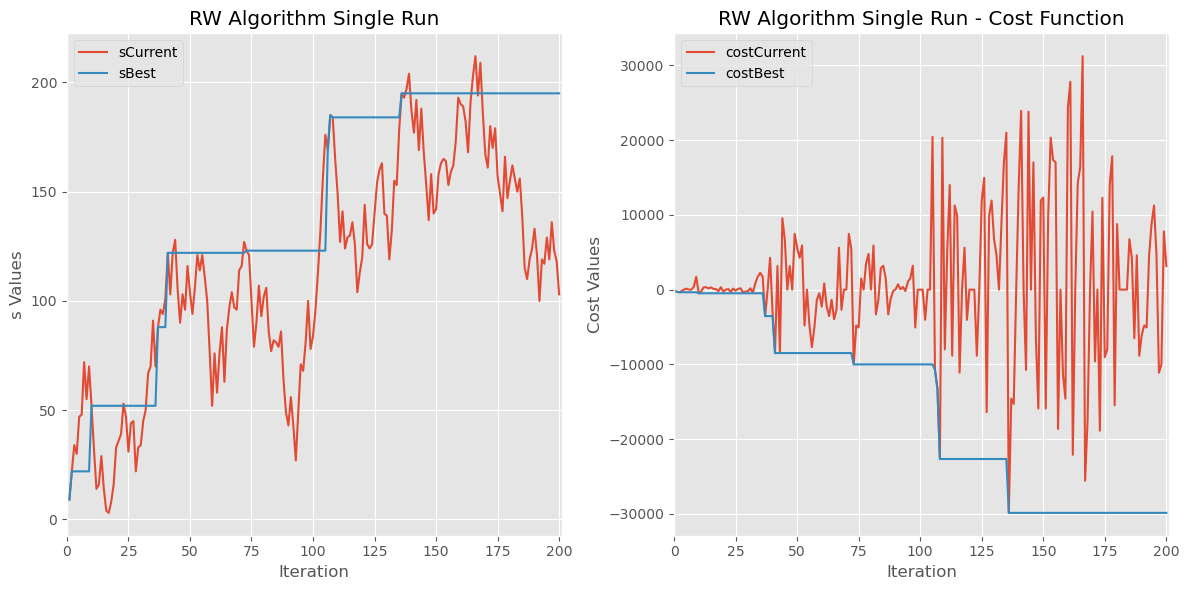

In [8]:
plot_single_run(result, 'RW', maxIter)

# Exercise 2: Random Sampling

The **Random Sampling (RS) algorithm** is a simple optimization technique where, instead of exploring neighboring solutions (as in **Random Walk**), the algorithm selects **random solutions from the entire search space** at each iteration. The best solution is updated whenever a better one is found.

---

**Objective**
Implement the **Random Sampling (RS) algorithm** for optimization from scratch.

Given a cost function, our goal is to implement an algorithm that explores the entire search space **randomly** and keeps track of the best solution found.

---

**Instructions**
At each iteration, the algorithm will randomly sample a solution and evaluate its performance. Specifically, you will:

**Steps:**
0. **Initialize the algorithm**:
   - Start with an **initial solution** `sInitial`.
   - Compute its cost using the given `cost_function()`.
   - Set this as the **best solution** so far.

1. **Generate a new random solution**:
   - Instead of perturbing the current solution, choose a **completely random** value from the entire search range (e.g., between `0` and `500`).

2. **Evaluate the new solution’s cost**:
   - Compute the cost of the new solution using the given `cost_function(sCurrent)`.

3. **Update the best solution**:
   - If the new solution is better (lower cost) than the best solution found so far, update both the **best solution** and **best cost**.

4. **Store iteration data**:
   - At each iteration, store the following information in a matrix:
     - The **iteration number**.
     - The **current solution** (`sCurrent`).
     - The **best solution** found so far (`sBest`).
     - The **cost of the current solution**.
     - The **cost of the best solution**.

5. **Repeat** steps 1–4 for a specified number of iterations (`maxIter`).

---

**Hints:
- Instead of calling `random_neighbor(sCurrent)`, use a function that selects a **completely random** value between `0` and `500` (or another specified range).
- Use **NumPy’s** `empty` function to initialize a matrix to store the iteration results.
- Store the **initial values** in the first row of the matrix before the loop starts.

---

In [9]:
def RS(sInitial, maxIter, cost_function, search_range=(0, 500), print_info=True):
    """
    Implements the Random Sampling (RS) algorithm for optimization.

    Unlike the Random Walk (RW), this method selects the next value of s
    randomly from all possible values within the given range, rather than 
    just the neighbors of the current s.

    Parameters:
        sInitial (int): Initial value of s.
        maxIter (int): Maximum number of iterations.
        cost_function (function): The function to evaluate the cost of a given solution.
        search_range (tuple): The lower and upper bounds of s (default is (0,500)).

    Returns:
        np.ndarray: A matrix storing iteration data (iteration number, sCurrent, sBest, costCurrent, costBest).
    """

    # Initialize the current solution and best solution to the initial value (sInitial)
    sCurrent, sBest = sInitial, sInitial
    
    # Compute the initial cost
    costCurrent = cost_function(sInitial)
    
    # Initialize the best cost with the initial cost
    costBest = costCurrent

    # Create an empty matrix to store iteration results
    # Each row will store: [iteration number, sCurrent, sBest, costCurrent, costBest]
    matrix = np.empty((maxIter, 5))
    
    # Store the initial values in the first row
    matrix[0, :] = [0, sCurrent, sBest, costCurrent, costBest]

    # Iterate through the optimization process
    for i in range(1, maxIter):
        # Select a new random solution within the defined search range
        sCurrent = randint(search_range[0], search_range[1])
        
        # Compute the cost of the new solution
        costCurrent = cost_function(sCurrent)

        # Update the best solution if the new one is better (lower cost)
        if costCurrent < costBest:
            costBest = costCurrent
            sBest = sCurrent
        
        # Store the iteration data
        matrix[i, :] = [i, sCurrent, sBest, costCurrent, costBest]

    if print_info:    
        print("Final Iteration:", int(i))
        print(f"Best Solution Found: {int(sBest)} with Cost: {costBest:.4f}")
        print(f"Final Current Solution: {int(sCurrent)} with Cost: {costCurrent:.4f}")
    
    # Return the matrix with all recorded data
    return matrix


- Call the optimizer Random Walk

In [10]:
# We define times=1 because we will compute more times all the optimization processes in a second part of the notebook.
result['RS'][0] = RS(initial_point, maxIter, cost)

Final Iteration: 200
Best Solution Found: 496 with Cost: -195050.5716
Final Current Solution: 186 with Cost: -0.0000


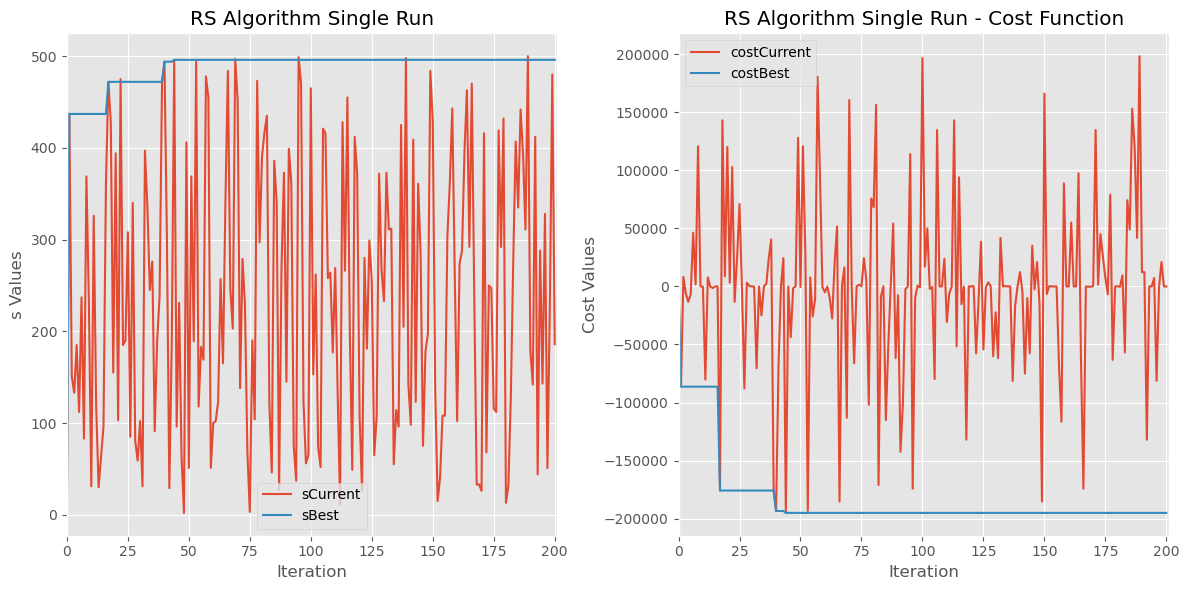

In [11]:
plot_single_run(result, 'RS', maxIter)

# Exercise 3: Greedy Deterministic

The **Greedy Deterministic (GD) algorithm** is an optimization technique that ensures a **deterministic improvement** at each step.  
Unlike **Random Walk (RW)**, which selects a neighbor randomly, the **GD algorithm always chooses the best available neighbor**, moving towards a better solution at each iteration.

---

**Objective**
Implement the **Greedy Deterministic (GD) algorithm** for optimization from scratch.

Given a cost function, our goal is to implement an algorithm that **always picks the best neighboring solution** to iteratively improve the objective function.

---

**Instructions**
At each iteration, the algorithm evaluates all neighboring solutions and selects the **best one**. Specifically, you will:

**Steps:**
0. **Initialize the algorithm**:
   - Start with an **initial solution** `sInitial`.
   - Compute its cost using the given `cost_function()`.
   - Set this as the **best solution** so far (`sBest`).

1. **Generate neighboring solutions**:
   - Use a `neighbors()` function to get all **neighboring solutions** of `sCurrent`.
   - The neighbors should be within a step size `d=10` from `sCurrent`.

2. **Evaluate the neighbors’ costs**:
   - Compute the cost for each neighboring solution using `cost_function()`.
   - Identify the **neighbor with the lowest cost**.

3. **Move to the best neighbor**:
   - If the best neighbor has a **lower cost** than `sCurrent`, update `sCurrent` to this neighbor.
   - Otherwise, keep `sCurrent` unchanged.

4. **Update the best solution**:
   - If `sCurrent` has a lower cost than `sBest`, update `sBest` and its cost.

5. **Store iteration data**:
   - At each iteration, store the following information in a matrix:
     - **Iteration number**.
     - **Current solution (`sCurrent`)**.
     - **Best solution found so far (`sBest`)**.
     - **Cost of the current solution (`costCurrent`)**.
     - **Cost of the best solution (`costBest`)**.

6. **Repeat** steps 1–5 for a specified number of iterations (`maxIter`).

---


In [12]:
# Greedy Deterministic (GD) algorithm implementation
def GD(sInitial, maxIter, cost_function, print_info=True):
    """
    Implements the Greedy Deterministic (GD) optimization algorithm.
    
    This method always selects the best available neighbor of the current solution, ensuring 
    a deterministic improvement at each step.
    
    Parameters:
        sInitial (int): The initial solution (starting point in the search space).
        maxIter (int): The maximum number of iterations to perform.
        cost_function (function): A function that calculates the cost of a given solution.
    
    Returns:
        np.ndarray: A matrix containing the iteration data:
                    [iteration number, current solution, best solution, current cost, best cost]
    """
    
    # Initialize the current solution to the initial solution
    sCurrent = sInitial
    
    # Compute the cost of the initial solution
    costCurrent = cost_function(sInitial)
    
    # Initialize the best solution and best cost with the initial values
    sBest = sCurrent
    costBest = costCurrent

    # Create a matrix to store iteration data: [iteration number, sCurrent, sBest, costCurrent, costBest]
    matrix = np.empty((maxIter, 5))
    
    # Store the initial iteration data
    matrix[0, :] = [0, sCurrent, sBest, costCurrent, costBest]

    # Loop through the maximum number of iterations
    for i in range(1, maxIter):
        # Generate a list of neighboring solutions within a step size of d=10
        neigh_s = neighbors(sCurrent, d=10)
        
        # Compute the cost of each neighboring solution
        cost_neigh = cost_function(neigh_s)
        
        # Identify the neighbor with the lowest cost
        min_idx = np.argmin(cost_neigh)
        
        # If the best neighbor is better than the current solution, move to it
        if costCurrent >= cost_neigh[min_idx]:
            sCurrent = neigh_s[min_idx]
            costCurrent = cost_neigh[min_idx]
        
        # Update the best solution if the current one is the best seen so far
        if costCurrent < costBest:
            sBest = sCurrent
            costBest = costCurrent

        # Store the data for this iteration
        matrix[i, :] = [i, sCurrent, sBest, costCurrent, costBest]
    
    if print_info:
        print("Final Iteration:", int(i))
        print(f"Best Solution Found: {int(sBest)} with Cost: {costBest:.4f}")
        print(f"Final Current Solution: {int(sCurrent)} with Cost: {costCurrent:.4f}")
    
    # Return the iteration matrix
    return matrix


- Call the optimizer Random Walk

In [13]:
result['GD'][0] = GD(initial_point, maxIter, cost)

Final Iteration: 200
Best Solution Found: 21 with Cost: -400.0000
Final Current Solution: 21 with Cost: -400.0000


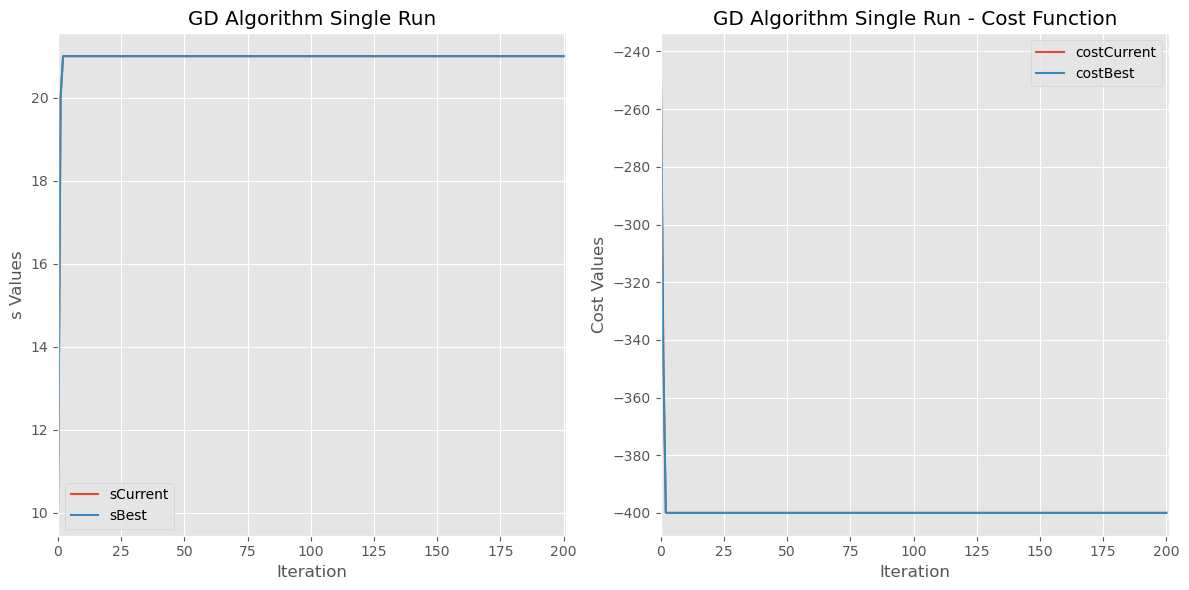

In [14]:
plot_single_run(result, 'GD', maxIter)

# Exercise 4: Greedy Stochastic

**Overview**
The **Greedy Stochastic (GS) algorithm** is an optimization technique that balances exploration and exploitation. Unlike purely greedy approaches, which always take the best immediate step, **GS selects a random neighbor** of the current best solution, allowing for some exploration while still favoring improvement.

**Objective**
Your task is to **implement the Greedy Stochastic (GS) algorithm from scratch** to optimize a given cost function.

**Instructions**

Follow these steps to implement the **Greedy Stochastic (GS) algorithm**:

**Step 1: Initialization**
- Start with an **initial solution** `s_initial`.
- Compute its **cost** using the provided function `cost(s_initial)`.
- Set this as both the **current solution** and the **best solution**.

**Step 2: Prepare Data Storage**
- You need to track the **iteration number, current solution, best solution, current cost, and best cost**.
- Create a **NumPy matrix** to store these values across iterations.
- Store the **initial values** in the first row of the matrix.

**Step 3: Iterative Improvement**
For each iteration:

1. **Select a new solution**  
   - Instead of picking any random neighbor, select a **random neighbor of the best solution so far**.  
   - Use the function `random_neighbor(sBest)`.

2. **Evaluate the new solution**  
   - Compute its cost using `cost(sCurrent)`.

3. **Update the best solution**  
   - If the new solution is **better (lower cost)** than the best solution so far, update both:
     - `sBest` (best solution)
     - `costBest` (best cost)

4. **Store iteration data**  
   - Save the iteration number, current solution, best solution, current cost, and best cost in the matrix.

**Step 4: Repeat for a Fixed Number of Iterations**
- Continue the process until reaching the maximum number of iterations (`max_iterations`).

---

In [15]:
def GS(s_initial, max_iterations, cost_function, print_info=True):
    """
    Implements the Greedy Stochastic (GS) optimization algorithm.

    In this algorithm, the next value of 's' is randomly selected from 
    the neighbors of the best solution found so far. This introduces some 
    exploration while still favoring local improvement.

    Parameters:
        s_initial (int): The initial value of s.
        max_iterations (int): The maximum number of iterations to run the algorithm.
        cost_function (function): A function that computes the cost given an input s.

    Returns:
        np.ndarray: A matrix storing iteration number, current s, best s, 
                    current cost, and best cost for all iterations.
    """
    
    # Initialize the current solution and its cost
    sCurrent = s_initial
    costCurrent = cost_function(sCurrent)

    # Initialize the best solution and its cost
    sBest = sCurrent
    costBest = costCurrent

    # Create a matrix to store results (iteration, current s, best s, current cost, best cost)
    results_matrix = np.empty((max_iterations, 5))

    # Store initial values in the matrix
    results_matrix[0, :] = [0, sCurrent, sBest, costCurrent, costBest]

    # Loop through the maximum number of iterations
    for i in range(1, max_iterations):
        # Select a new solution randomly from the neighbors of the best solution found so far
        sCurrent = random_neighbor(sBest)

        # Compute the cost of the new solution
        costCurrent = cost_function(sCurrent)

        # If the new solution improves upon the best found so far, update best values
        if costCurrent < costBest:
            sBest = sCurrent
            costBest = costCurrent

        # Store the results for this i
        results_matrix[i, :] = [i, sCurrent, sBest, costCurrent, costBest]

    if print_info:
        print("Final i:", int(i))
        print(f"Best Solution Found: {int(sBest)} with Cost: {costBest:.4f}")
        print(f"Final Current Solution: {int(sCurrent)} with Cost: {costCurrent:.4f}")
    
    # Return the matrix containing the results of all i
    return results_matrix


In [16]:
result['GS'][0] = GS(initial_point, maxIter, cost)

Final i: 200
Best Solution Found: 21 with Cost: -400.0000
Final Current Solution: 14 with Cost: 303.9749


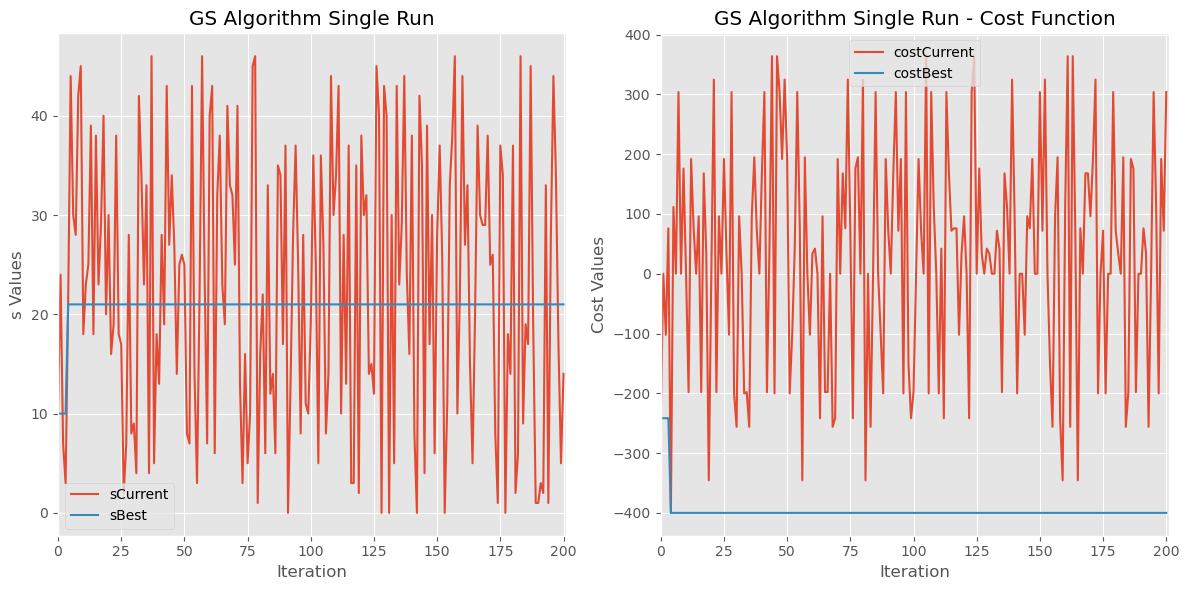

In [17]:
plot_single_run(result, 'GS', maxIter)

- Compare the Evolution of the Cost Functional for the 4 algorithms

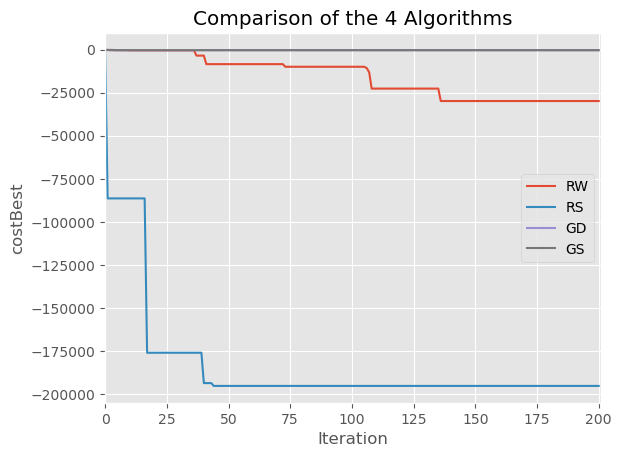

In [18]:
plt.plot(result['RW'][0,:,0], np.average(result['RW'][:,:,4], axis=0), label='RW')
plt.plot(result['RS'][0,:,0], np.average(result['RS'][:,:,4], axis=0), label='RS')
plt.plot(result['GD'][0,:,0], np.average(result['GD'][:,:,4], axis=0), label='GD')
plt.plot(result['GS'][0,:,0], np.average(result['GS'][:,:,4], axis=0), label='GS')
pretty_plot_gs(xlim=(0,maxIter), xlabel='Iteration', ylabel='costBest', title='Comparison of the 4 Algorithms')

- We now run all the algorithms several times:

In [19]:
times_many = 30
maxIter_many = 2000
results_many = {'RW':np.empty((times_many, maxIter_many, 5)) , 'RS':np.empty((times_many, maxIter_many, 5)), 'GD':np.empty((times_many, maxIter_many, 5)), 'GS':np.empty((times_many, maxIter_many, 5))}
initial_point_many = 100
for i in range(times_many):
    results_many['RW'][i] = RW(initial_point_many, maxIter_many, cost, print_info=False)
    results_many['RS'][i] = RS(initial_point_many, maxIter_many, cost, print_info=False)
    results_many['GD'][i] = GD(initial_point_many, maxIter_many, cost, print_info=False)
    results_many['GS'][i] = GS(initial_point_many, maxIter_many, cost, print_info=False)

    
# Print the average minimum number for all methods.
ave_rw = np.average(results_many['RW'][:, :, 2])
ave_rs = np.average(results_many['RS'][:, :, 2])
ave_gd = np.average(results_many['GD'][:, :, 2])
ave_gs = np.average(results_many['GS'][:, :, 2])

print(f"Average of sBest for Random Walk:          {ave_rw:.4f}")
print(f"Average of sBest for Random Sampling:      {ave_rs:.4f}")
print(f"Average of sBest for Greedy Deterministic: {ave_gd:.4f}")
print(f"Average of sBest for Greedy Search:        {ave_gs:.4f}")

Average of sBest for Random Walk:          419.4109
Average of sBest for Random Sampling:      489.0977
Average of sBest for Greedy Deterministic: 110.9940
Average of sBest for Greedy Search:        468.8542


- We plot the average of the evolution of the Cost Functions

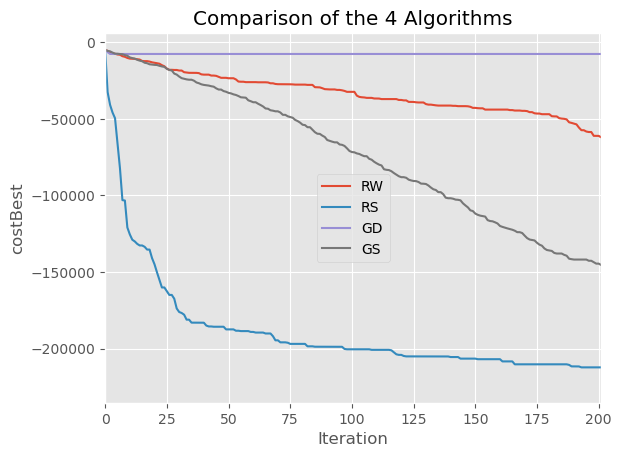

In [20]:
plt.plot(results_many['RW'][0,:,0], np.average(results_many['RW'][:,:,4], axis=0), label='RW')
plt.plot(results_many['RS'][0,:,0], np.average(results_many['RS'][:,:,4], axis=0), label='RS')
plt.plot(results_many['GD'][0,:,0], np.average(results_many['GD'][:,:,4], axis=0), label='GD')
plt.plot(results_many['GS'][0,:,0], np.average(results_many['GS'][:,:,4], axis=0), label='GS')
pretty_plot_gs(xlim=(0,maxIter), xlabel='Iteration', ylabel='costBest', title='Comparison of the 4 Algorithms')

In [21]:
print('''AT THE 100th ITERATION
\tAvg.\tSD
RW\t{:.0f}\t{:.0f}
RS\t{:.0f}\t{:.0f}
GD\t{:.0f}\t{:.0f}
GS\t{:.0f}\t{:.0f}'''.format(np.average(results_many['RW'][:,100,4]), np.std(results_many['RW'][:,100,4]),
    np.average(results_many['RS'][:,100,4]), np.std(results_many['RS'][:,100,4]),
    np.average(results_many['GD'][:,100,4]), np.std(results_many['GD'][:,100,4]),
    np.average(results_many['GS'][:,100,4]), np.std(results_many['GS'][:,100,4])))

AT THE 100th ITERATION
	Avg.	SD
RW	-32408	28935
RS	-200381	18001
GD	-7700	0
GS	-71686	31137
